## __Applying K-Nearest Neighbors__
Let's examine how to create a KNN classifier model.

## Step 1: Import Required Libraries and Read the Dataset

- Import pandas, NumPy, matplotlib.pyplot, and Seaborn libraries
- Configure matplotlib settings
- Read the dataset and display the first five rows


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
#df.Purchased.unique()
#df.count()
#df[df.Purchased == 0].count()
#df[df.Purchased == 1].count()
#df.groupby([df.Purchased]).size()
#df1 = df.groupby([df.Purchased]).size().to_frame('size').reset_index()
#df1

,Purchased,size
0,0,257
1,1,143


__Observations__
- In the above output, you can see the first few rows of the dataset.
- There are different columns such as user ID, gender, age, estimated salary, and purchased data.

Let us check the info.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


__Observation__
- There are no null values.

## Step 2: Check How Many People Have Purchased

In [26]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

__Observation__
- The output above indicates that 143 people purchased while 257 people didn't.

Let us create a dummy variable for gender.

In [27]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)

In [28]:
Gender

,Male
0,True
1,True
2,False
3,False
4,True
...,...
395,False
396,True
397,False
398,True


In [29]:
df = pd.concat([df,Gender],axis=1)

In [30]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,True
1,15810944,Male,35,20000,0,True
2,15668575,Female,26,43000,0,False
3,15603246,Female,27,57000,0,False
4,15804002,Male,19,76000,0,True
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,False
396,15706071,Male,51,23000,1,True
397,15654296,Female,50,20000,1,False
398,15755018,Male,36,33000,0,True


Drop the gender column as the dummy variable is converted

In [31]:
df.drop(['Gender'],axis=1,inplace=True)

In [32]:
df

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


## Step 3: Define Features and Target Variable

- Define the feature matrix X and target variable y

In [33]:
X = df[['Age','EstimatedSalary','Male']]
y = df['Purchased']

## Step 4: Standardize the Features

- Import StandardScaler and scale the features


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(X)

StandardScaler()

Now, let's transform the features.

In [37]:
scaled_features = scaler.transform(X)
scaled_features

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

Now, let's create a DataFrame.

In [38]:
df_feat = pd.DataFrame(scaled_features,columns=X.columns)
df_feat.head()

,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


__Observation__
- The data is transformed here.

## Step 5: Split the Data into Training and Testing Sets

- Import train_test_split and split the data


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.20)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        53
           1       0.74      0.63      0.68        27

    accuracy                           0.80        80
   macro avg       0.78      0.76      0.77        80
weighted avg       0.80      0.80      0.80        80



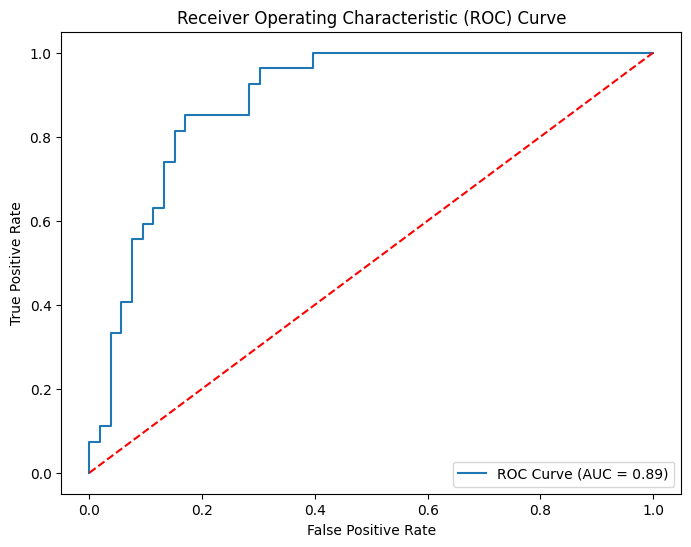

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the logistic regression model
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
model = lr.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# ROC Curve
proba = model.predict_proba(X_test)
proba_class1 = proba[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [44]:
accuracy = model.score(X_test, y_test)

In [45]:
accuracy

0.8

In [46]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[47,  6],
       [10, 17]], dtype=int64)

**Observations**
- Here, we can observe the classification report and ROC curve of the classification.

## Step 6: Train the KNN Model and Make Predictions

- Import KNeighborsClassifier and train the model
- Make predictions using the model
- Print confusion matrix and classification report


In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.20)

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
pred = knn.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(confusion_matrix(y_test,pred))

[[38  7]
 [ 5 30]]


__Observation__
- This is a confusion matrix, where 2 is classified and 4 is misclassified for the non-purchased case.

In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        45
           1       0.81      0.86      0.83        35

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



__Observations__

- In the above output, we can see that we are able to achieve 82% accuracy.
- For the purchase, we are able to have a precision of 77 and a recall of 90 with an f1-score of 77.
